In [1]:
from IPython.display import Image

## Q1. Notebook

We'll start with the same notebook we ended up with in homework 1.
We cleaned it a little bit and kept only the scoring part. You can find the initial notebook [here](homework/starter.ipynb).

Run this notebook for the March 2023 data.

What's the standard deviation of the predicted duration for this dataset?

* 1.24
* 6.24
* 12.28
* 18.28

In [2]:
!pip freeze | grep scikit-learn

scikit-learn @ file:///tmp/build/80754af9/scikit-learn_1642617106979/work
scikit-learn-intelex==2021.20220215.212715


In [3]:
!python -V

Python 3.9.12


In [4]:
import pickle
import pandas as pd

In [5]:
with open('./description_homework/model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

/home/aleksandr/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DictVectorizer from version 1.5.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/aleksandr/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.5.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [ ]:
# df = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet')

In [7]:
df = read_data('../01-intro/data/yellow_tripdata_2023-03.parquet')

In [8]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = model.predict(X_val)

In [11]:
y_pred.std()

6.247488852238703

## ***Answer for Q1:==*** 6.24

## Q2. Preparing the output

Like in the course videos, we want to prepare the dataframe with the output. 

First, let's create an artificial `ride_id` column:

```python
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')
```

Next, write the ride id and the predictions to a dataframe with results. 

Save it as parquet:

```python
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)
```

What's the size of the output file?

* 36M
* 46M
* 56M
* 66M

__Note:__ Make sure you use the snippet above for saving the file. It should contain only these two columns. For this question, don't change the
dtypes of the columns and use `pyarrow`, not `fastparquet`. 

In [12]:
year = 2023
month = 3

df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')

In [13]:
df['ride_id'].head()

0    2023/03_0
1    2023/03_1
2    2023/03_2
3    2023/03_3
4    2023/03_4
Name: ride_id, dtype: object

In [14]:
df['predictions'] = y_pred

In [15]:
output_file = 'submition.parquet'  # замените на нужный путь и имя файла

df[['ride_id', 'predictions']].to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [17]:
!ls -la

итого 68448
drwxrwxr-x 4 aleksandr aleksandr     4096 июн 12 13:44 .
drwxrwxr-x 7 aleksandr aleksandr     4096 июн 11 16:20 ..
drwxrwxr-x 2 aleksandr aleksandr     4096 июн 11 16:20 description_homework
-rw-rw-r-- 1 aleksandr aleksandr  1426488 июн 12 13:44 hw04.ipynb
drwxrwxr-x 2 aleksandr aleksandr     4096 июн 12 13:30 screenshots
-rw-rw-r-- 1 aleksandr aleksandr 68641783 июн 12 13:44 submition.parquet


In [18]:
!ls -lh submition.parquet

-rw-rw-r-- 1 aleksandr aleksandr 66M июн 12 13:44 submition.parquet


In [20]:
def my_round_ceil(a, b=10):
    return (a * 10 + 10) // 10

In [25]:
import os
file_size = os.path.getsize(output_file)
print(f'File size: {my_round_ceil(file_size / (1024 * 1024)):.0f}M')

File size: 66M


## ***Answer for Q2:==*** 66M

## Q3. Creating the scoring script

Now let's turn the notebook into a script. 

Which command you need to execute for that?

In [39]:
!jupyter nbconvert --to script ./description_homework/starter.ipynb --output ../trans_from_starter_ipynb


[NbConvertApp] Converting notebook ./description_homework/starter.ipynb to script
[NbConvertApp] Writing 931 bytes to description_homework/../trans_from_starter_ipynb.py


In [44]:
input_file = './trans_from_starter_ipynb.py'
output_file = './trans_from_starter_ipynb_clean.py'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    skip_line = 0
    for line in infile:
        # Check if the line starts with '# In[' or 'get_ipython()'
        if line.strip().startswith(('# In[', 'get_ipython()')):
            skip_line = 3
        if skip_line>0:
            skip_line -= 1
            continue
        outfile.write(line)

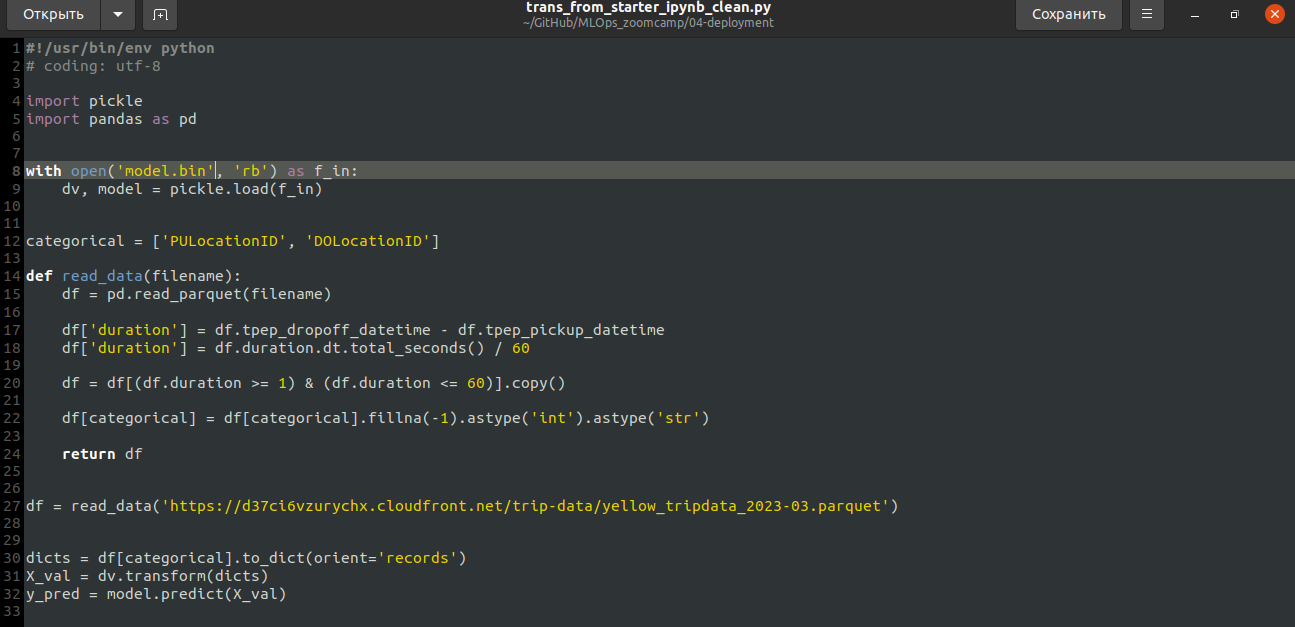

In [43]:
Image(filename='./screenshots/screenshot_Q3_hw4.png')

## ***Answer for Q3:==*** jupyter nbconvert --to script ./description_homework/starter.ipynb --output ../trans_from_starter_ipynb

## Q4. Virtual environment

Now let's put everything into a virtual environment. We'll use pipenv for that.

Install all the required libraries. Pay attention to the Scikit-Learn version: it should be the same as in the starter
notebook.

After installing the libraries, pipenv creates two files: `Pipfile`
and `Pipfile.lock`. The `Pipfile.lock` file keeps the hashes of the
dependencies we use for the virtual env.

What's the first hash for the Scikit-Learn dependency?

## ***Answer for Q4:==*** 3,316,216

## ***Answer for Q5:==*** 24.77

## ***Answer for Q6:==*** 4534